In [33]:
# file information check (순서대로 PS!, HST용)

import numpy as np
import astropy
import scipy
import photutils
import matplotlib.pyplot as plt
import astropy.io.fits as fits

ps1_image_file = "C:/Users/avril/Downloads/cutout_rings.v3.skycell.1669.006.stk.i.unconv.fits"
ps1_galaxy_data = fits.open(ps1_image_file)
print(ps1_galaxy_data.info())

image=ps1_galaxy_data[0].data
header=ps1_galaxy_data[0].header

keys = [k for k in header.keys() if isinstance(k, str)]
for pat in ["PHOT", "ZP", "MAG", "GAIN", "READ", "NOISE", "EXPT", "FILTER", "BUNIT", "CD", "CDELT"]:
    hits = [k for k in keys if pat in k.upper()]
    if hits:
        print(pat, "->", hits[:30])

hst_image_file = r"C:\Users\avril\Downloads\hlsp_heritage_hst_wfc3-ir_horsehead_f110w_v1_drz-sci.fits"
hst_galaxy_data = fits.open(image_file)
print(hst_galaxy_data.info())

print("---------------------------------------------------")

hst_image_file = r"C:\Users\avril\Downloads\hlsp_heritage_hst_wfc3-ir_horsehead_f110w_v1_drz-sci.fits"
hst_galaxy_data = fits.open(hst_image_file)
print(hst_galaxy_data.info())

image=hst_galaxy_data[0].data
header=hst_galaxy_data[0].header

keys = [k for k in header.keys() if isinstance(k, str)]
for pat in ["PHOT", "ZP", "MAG", "GAIN", "READ", "NOISE", "EXPT", "FILTER", "BUNIT", "CD", "CDELT"]:
    hits = [k for k in keys if pat in k.upper()]
    if hits:
        print(pat, "->", hits[:30])

Filename: C:/Users/avril/Downloads/cutout_rings.v3.skycell.1669.006.stk.i.unconv.fits # 본인 파일 경로 복붙
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     292   (240, 240)   float32   
None
PHOT -> ['PHOT_V']
ZP -> ['ZPT_0000', 'ZPT_0001', 'ZPT_0002', 'ZPT_0003', 'ZPT_0004', 'ZPT_0005', 'ZPT_0006', 'ZPT_0007', 'ZPT_0008', 'ZPT_0009', 'ZPT_0010', 'ZPT_0011', 'ZPT_0012', 'ZPT_0013', 'ZPT_0014', 'ZPT_0015', 'ZPT_0016', 'ZPT_0017', 'ZPT_0018', 'ZPT_0019', 'ZPT_0020', 'ZPT_0021', 'ZPT_0022', 'ZPT_0023', 'ZPT_0024', 'ZPT_0025', 'ZPT_0026', 'ZPT_0027', 'ZPT_0028', 'ZPT_0029']
MAG -> ['IMAGEID']
GAIN -> ['CELL.GAIN']
READ -> ['CELL.READNOISE']
NOISE -> ['CELL.READNOISE']
EXPT -> ['EXPTIME']
FILTER -> ['FPA.FILTERID', 'FPA.FILTER']
CD -> ['CDELT1', 'CDELT2']
CDELT -> ['CDELT1', 'CDELT2']
Filename: C:/Users/avril/Downloads/cutout_rings.v3.skycell.1669.006.stk.i.unconv.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       

Filename: C:/Users/avril/Downloads/cutout_rings.v3.skycell.1669.006.stk.i.unconv.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     292   (240, 240)   float32   
shape: (240, 240)
dtype: >f4
min/max: 1246.5293 1.8921229e+06
filter: i.00000
exptime(s): 1575.0
pixel scale (arcsec/pix) from CDELT: (0.2500000060535957, 0.2500000060535957)
gain (e-/ADU): 1.095099
readnoise (e-): 264.9244
ZPT count: 35
ZP mean/std: 24.56527285714286 0.019829533755980847
ZP min/max: 24.50853 24.60622
PHOT_V: 37083


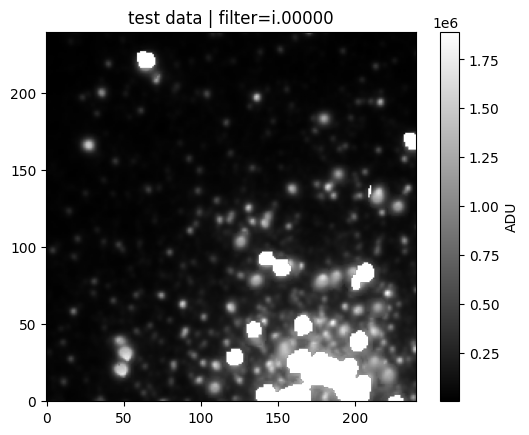

In [14]:
# draw PS1

import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
from astropy.wcs.utils import proj_plane_pixel_scales

image_file = r"C:/Users/avril/Downloads/cutout_rings.v3.skycell.1669.006.stk.i.unconv.fits"

with fits.open(image_file) as hdul: # hdu list라서 변수명 hdul~
    hdul.info()
    image = hdul[0].data
    header = hdul[0].header

print("shape:", image.shape) # (dy,dx) 순인 거 주의합시답 대충 픽셀 수라고 생각하세용
print("dtype:", image.dtype) # 자료형 출력. f4==float32. 바이트로 쓴 축약형
print("min/max:", np.nanmin(image), np.nanmax(image)) # NaN 무시하려면 min/max 말고 nanmin/nanmax

filt = header.get("FPA.FILTER", header.get("FILTER", "blank")) # 필터. get 메소드 아니까 주석 생략
exptime = header.get("EXPTIME", "blank") # 노출 시간
print("filter:", filt)
print("exptime(s):", exptime)

if "CDELT1" in header and "CDELT2" in header:
    scale_arcsec = (abs(header["CDELT1"]) * 3600, abs(header["CDELT2"]) * 3600)
    print("pixel scale (arcsec/pix) from CDELT:", scale_arcsec)
else:
    w = WCS(header)
    scales_deg = proj_plane_pixel_scales(w)
    print("pixel scale (arcsec/pix) from WCS:", scales_deg * 3600) # 호오옥시 CDELT 없거나 왜곡 있을까봐 추가한 부분

gain = header.get("CELL.GAIN", None)
readnoise = header.get("CELL.READNOISE", None)
print("gain (e-/ADU):", gain if gain is not None else "blank")
print("readnoise (e-):", readnoise if readnoise is not None else "blank")

zpt_keys = [k for k in header.keys() if isinstance(k, str) and k.startswith("ZPT_")]
if zpt_keys:
    zpts = np.array([header[k] for k in zpt_keys], dtype=float) # 넘파이 어레이 만들깅
    print(f"ZPT count: {len(zpts)}")
    print("ZP mean/std:", float(np.mean(zpts)), float(np.std(zpts))) # std는 산포도입니당
    print("ZP min/max:", float(np.min(zpts)), float(np.max(zpts)))
else:
    print("there's not ZPT table")

print("PHOT_V:", header.get("PHOT_V", "blank"))

plt.imshow(image, origin="lower", cmap="gray")
plt.colorbar(label="ADU")
plt.title(f"test data | filter={filt}")
plt.show()

Filename: C:\Users\avril\Downloads\hlsp_heritage_hst_wfc3-ir_horsehead_f110w_v1_drz-sci.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    1103   (3239, 3346)   float32   
  1  HDRTAB        1 BinTableHDU    557   18R x 274C   [9A, 3A, J, D, D, D, D, D, D, D, D, D, D, D, D, J, 6A, 9A, 7A, 18A, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, J, J, D, D, D, D, D, D, J, J, 8A, 23A, 11A, 17A, 4A, D, D, J, J, D, D, D, D, 23A, D, D, D, D, J, J, D, 23A, 8A, J, D, D, D, 23A, 1A, D, D, D, D, D, D, 12A, 12A, 8A, 23A, D, D, 19A, 10A, D, D, D, 2A, 3A, 3A, 4A, 8A, 7A, D, J, D, 6A, 9A, D, D, D, 9A, 18A, 3A, J, 5A, D, D, D, 8A, D, D, D, D, D, 23A, 1A, D, 23A, D, D, D, 3A, J, 1A, 4A, 19A, 3A, 6A, D, D, D, D, D, 23A, D, D, D, D, D, 1A, J, J, J, J, 8A, 23A, J, J, 10A, 7A, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, 12A, D, 37A, 23A, D, 3A, 8A, D, J, D, D, 6A, 4A, D, D, D, D, D, D, D, D, D, D, D, 19A, D, J, 23A, D, 8A, D, D, 13A, D, D, J, D,

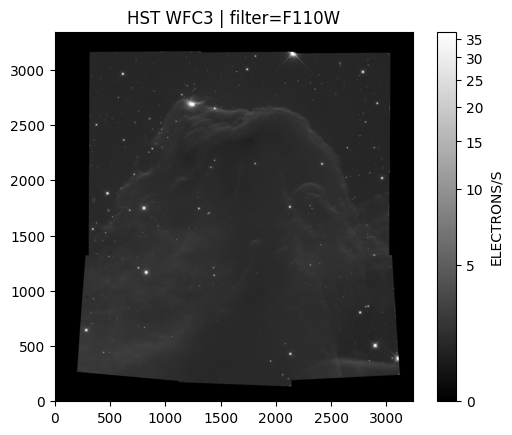

In [8]:
# draw HST

import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
from astropy.wcs.utils import proj_plane_pixel_scales

image_file = r"C:\Users\avril\Downloads\hlsp_heritage_hst_wfc3-ir_horsehead_f110w_v1_drz-sci.fits"

with fits.open(image_file) as hdul: # hdu list라서 변수명 hdul~
    hdul.info()
    image = hdul[0].data
    header = hdul[0].header

print("shape:", image.shape) # (dy,dx) 순인 거 주의합시답 대충 픽셀 수라고 생각하
print("dtype:", image.dtype) # 자료형 출력. f4==float32. 바이트로 쓴 축약형
print("min/max:", np.nanmin(image), np.nanmax(image)) # NaN 무시하려면 min/max 말고 nanmin/nanmax

# Zeropoint
ZP = header.get("PHOTZPT")

# Gain
gain = header.get("CCDGAIN")

# Read noise (평균)
read_keys = ["READNSEA", "READNSEB", "READNSEC", "READNSED"]
read_vals = [header[k] for k in read_keys if k in header]
readnoise = np.mean(read_vals) if read_vals else None

# Exposure time
exptime = header.get("EXPTIME", header.get("TEXPTIME"))

# Filter
filt = header.get("FILTER")

# Unit
bunit = header.get("BUNIT", "UNKNOWN")

print("ZP:", ZP)
print("gain (e-/ADU):", gain)
print("readnoise (e-):", readnoise)
print("exptime:", exptime)
print("filter:", filt)
print("BUNIT:", bunit)

from astropy.visualization import simple_norm

norm = simple_norm(image, stretch="asinh", percent=99.9)
plt.imshow(image, origin="lower", cmap="gray", norm=norm)
plt.colorbar(label=bunit)
plt.title(f"HST WFC3 | filter={filt}")
plt.show()

Bunit: ELECTRONS/S
clipping:sigma=3.0, maxiters=5, cut for bright = 14.732146263122559
mean:1.5683207511901855, median:1.8911585807800293, std:0.9303577542304993
------------------------------------------


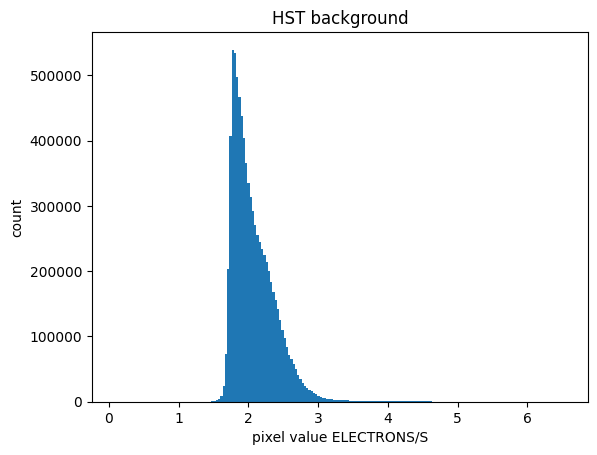

Filename: C:/Users/avril/Downloads/cutout_rings.v3.skycell.1669.006.stk.i.unconv.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     292   (240, 240)   float32   


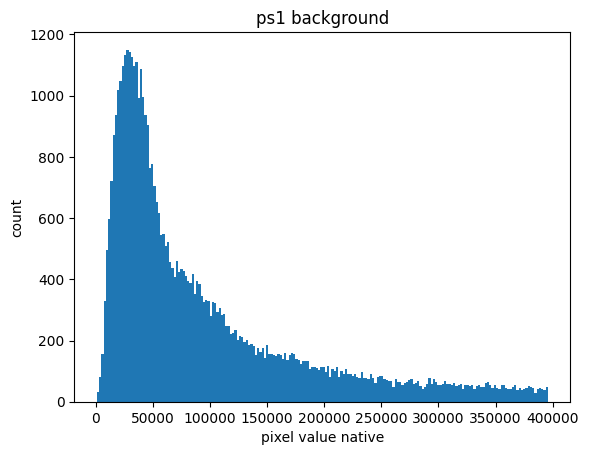

(81747.59375, 56068.125, 67930.390625)

In [34]:
# ver.1 HST용... PS1은 이걸로 돌리면 미친 밝기 땜에 그래프 발광해서 함수 수정해야됨

import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.stats import sigma_clipped_stats

def bg(image, header=None, *, sigma=3.0, iters=5, rmpercentile=99.99, plot=True, title=""):
    data = image.astype(np.float32, copy=False) # 오답노트-f4 쓰고 싶음 np. 말고 걍 문자열로
    finite = np.isfinite(data) # 유한수인지 쳌, NaN이나 양음 무한대면 False

    if not np.any(finite):
        raise ValueError("Invalid pixel. There's only NaN or inf") # 에러 발생시키기!
        
    vals = data[finite] # 마스킹!! True 위치의 값들만 모아서 array 만들기 마스킹은 arr[arr>3] 이런 걸로도 된다 흐흐
    toobright = np.nanpercentile(a=vals, q=99.9) # q값은 조정하세욤
    masking = (~finite) | (data>=toobright) # ~ 붙이는 이유 : NaN이나 inf가 False로 되어있어서 반전해서 써야 됨

    mean, median, std = sigma_clipped_stats(data, mask=masking, sigma=sigma, maxiters=iters)

    bunit = None
    if header is not None:
        bunit = header.get("BUNIT", None)

    if bunit:
        print(f"Bunit: {bunit}")
        print(f"clipping:sigma={sigma}, maxiters={iters}, cut for bright = {toobright}")
        print(f"mean:{float(mean)}, median:{float(median)}, std:{float(std)}")
        print("------------------------------------------")

    if plot:
        high, low = median+5*std, median-5*std
        sample = vals[(vals>low) & (vals<high) & (vals>0)] # 오답노트-NumPy 배열은 요소 여러 개라서 and or 연산자 못 씀
        if sample.size>0:
            plt.figure()
            plt.hist(sample, bins=200)
            plt.title(title or "Background histogram")
            plt.xlabel(f"pixel value {bunit if bunit else 'native'}")
            plt.ylabel("count")
            plt.show()

    return float(mean), float(median), float(std)

hst_file = r"C:\Users\avril\Downloads\hlsp_heritage_hst_wfc3-ir_horsehead_f110w_v1_drz-sci.fits"
with fits.open(hsl_file) as hdul: # hdu list라서 변수명 hdul~
    image = hdul[0].data
    header = hdul[0].header
bg(image, header, rmpercentile=99.99, title="HST background")

------------------------------------------
BUNIT: ELECTRONS/S
sigma_clip: sigma=3.0, iters=10
detect: nsigma=2.5, npixels=10, footprint_radius=8
rmpercentile=99.9, bright-cut value=21.325077056884766
mean=2.0169317722320557, median=1.9678514003753662, std=0.22498805820941925


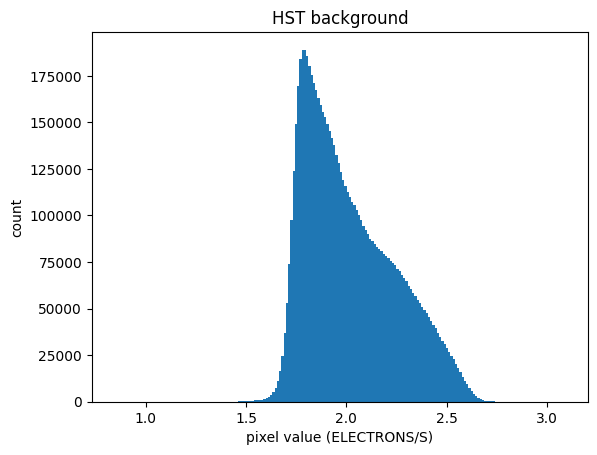

(2.0169317722320557, 1.9678514003753662, 0.22498805820941925)

In [48]:
# ver.2 HST 얘도 값 보정 들어가니 쪼끔 더 이뻐지긴 하는데 ver1이랑 차이 거의 무
# 수치는 보수적으로 잡자

import numpy as np
import matplotlib.pyplot as plt
from astropy.stats import sigma_clipped_stats, SigmaClip
from photutils.segmentation import detect_threshold, detect_sources
from photutils.utils import circular_footprint

def bg(image, header=None, *, sigma=3.0, iters=10, rmpercentile=99.9,
       plot=True, title="", nsigma=2.0, npixels=10, footprint_radius=10):

    data = image.astype('f4', copy=False)  # float32
    finite = np.isfinite(data) & (data != 0)  # 0 픽셀까지 제외시키자 제외 안 하면 또 스파이크 튄다..

    if not np.any(finite):
        raise ValueError("Invalid pixel: only NaN/inf/zero")

    vals = data[finite]

    # 위에 거랑 똑같이 밝은 픽셀 제거!!
    toobright = np.nanpercentile(vals, rmpercentile)
    base_mask = (~finite) | (data >= toobright)

    sigma_clip = SigmaClip(sigma=sigma, maxiters=iters)

    # 배경 추정 안정시키김
    threshold = detect_threshold(
        data,
        nsigma=nsigma,
        sigma_clip=sigma_clip,
        mask=base_mask
    )

    segment_img = detect_sources(data, threshold, npixels=npixels)

    if segment_img is None:
        src_mask = np.zeros(data.shape, dtype=bool)
    else:
        footprint = circular_footprint(radius=footprint_radius)
        src_mask = segment_img.make_source_mask(footprint=footprint)

    masking = base_mask | src_mask # 너무 밝거나, NaN이거나, 자동검출 다 마스킹

    mean, median, std = sigma_clipped_stats(
        data,
        sigma=sigma,
        maxiters=iters,
        mask=masking
    )

    bunit = header.get("BUNIT", None) if header is not None else None
    print("------------------------------------------")
    if bunit:
        print(f"BUNIT: {bunit}")
    print(f"sigma_clip: sigma={sigma}, iters={iters}")
    print(f"detect: nsigma={nsigma}, npixels={npixels}, footprint_radius={footprint_radius}")
    print(f"rmpercentile={rmpercentile}, bright-cut value={float(toobright)}")
    print(f"mean={float(mean)}, median={float(median)}, std={float(std)}")

    # 히스토그램(배경 픽셀만)
    if plot:
        low, high = median - 5*std, median + 5*std
        bg_vals = data[~masking]
        sample = bg_vals[(bg_vals > low) & (bg_vals < high)]
        if sample.size > 0:
            plt.figure()
            plt.hist(sample, bins=200)
            plt.title(title or "Background histogram (masked)")
            plt.xlabel(f"pixel value ({bunit if bunit else 'native'})")
            plt.ylabel("count")
            plt.show()

    return float(mean), float(median), float(std)

from astropy.io import fits

hst_file = r"C:\Users\avril\Downloads\hlsp_heritage_hst_wfc3-ir_horsehead_f110w_v1_drz-sci.fits"
with fits.open(hst_file) as hdul:
    image = hdul[0].data
    header = hdul[0].header

bg(image, header, title="HST background", nsigma=2.5, footprint_radius=8)

None
------------------------------------------
sigma_clip: sigma=3.0, iters=10
detect: nsigma=1.8, npixels=20, footprint_radius=15
rmpercentile=99.99, bright-cut value=1721036.875
mean=26093.3515625, median=24398.65234375, std=12449.30859375


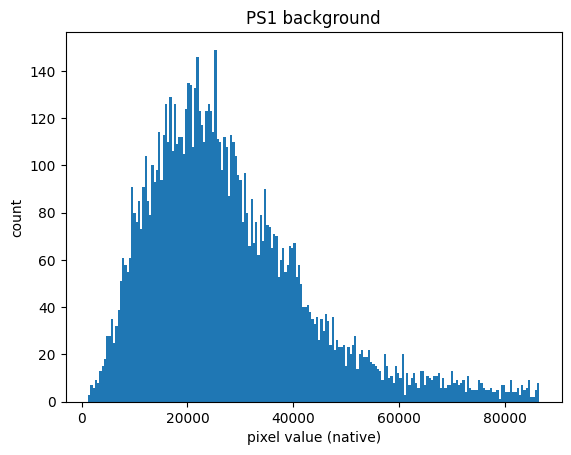

(26093.3515625, 24398.65234375, 12449.30859375)

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.stats import sigma_clipped_stats, SigmaClip
from photutils.segmentation import detect_threshold, detect_sources
from photutils.utils import circular_footprint

def bg(image, header=None, *, sigma=3.0, iters=10, rmpercentile=99.99,
       plot=True, title="", nsigma=1.8, npixels=20, footprint_radius=15): # 수치 좀 더 빡세게 잡음

    data = image.astype('f4', copy=False)  # float32
    finite = np.isfinite(data)  # 얜 0픽셀 제거 안 해도 ㄱㅊ

    if not np.any(finite):
        raise ValueError("Invalid pixel: only NaN/inf/zero")

    vals = data[finite]

    # 위에 거랑 똑같이 밝은 픽셀 제거!!
    toobright = np.nanpercentile(vals, rmpercentile)
    base_mask = (~finite) | (data >= toobright)

    sigma_clip = SigmaClip(sigma=sigma, maxiters=iters)

    # 배경 추정 안정
    threshold = detect_threshold(
        data,
        nsigma=nsigma,
        sigma_clip=sigma_clip,
        mask=base_mask
    )

    segment_img = detect_sources(data, threshold, npixels=npixels)

    if segment_img is None:
        src_mask = np.zeros(data.shape, dtype=bool)
    else:
        footprint = circular_footprint(radius=footprint_radius)
        src_mask = segment_img.make_source_mask(footprint=footprint)

    masking = base_mask | src_mask # 너무 밝거나 NaN이거나 자동 검출 다 마스킹

    mean, median, std = sigma_clipped_stats(
        data,
        sigma=sigma,
        maxiters=iters,
        mask=masking
    )

    bunit = header.get("BUNIT", None) if header is not None else None
    print("------------------------------------------")
    if bunit:
        print(f"BUNIT: {bunit}")
    print(f"sigma_clip: sigma={sigma}, iters={iters}")
    print(f"detect: nsigma={nsigma}, npixels={npixels}, footprint_radius={footprint_radius}")
    print(f"rmpercentile={rmpercentile}, bright-cut value={float(toobright)}")
    print(f"mean={float(mean)}, median={float(median)}, std={float(std)}")

    if plot:
        low, high = median - 5*std, median + 5*std
        bg_vals = data[~masking]
        sample = bg_vals[(bg_vals > low) & (bg_vals < high)]
        if sample.size > 0:
            plt.figure()
            plt.hist(sample, bins=200)
            plt.title(title or "Background histogram (masked)")
            plt.xlabel(f"pixel value ({bunit if bunit else 'native'})")
            plt.ylabel("count")
            plt.show()

    return float(mean), float(median), float(std)

from astropy.io import fits

hst_file = r"C:/Users/avril/Downloads/cutout_rings.v3.skycell.1669.006.stk.i.unconv.fits"
with fits.open(hst_file) as hdul:
    image = hdul[0].data
    header = hdul[0].header
bg(image, header, title="PS1 background", nsigma=1.8, footprint_radius=15)